In [1]:
import math as m
import numpy as np
from IPython.display import clear_output
from time import sleep
from scipy.signal import savgol_filter
import physt
import os
import pandas as pd
from pandas import DataFrame, Series  # for convenience
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import pims
import trackpy as tp

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
default_rc = dict(mpl.rcParams)

C:\conda\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [4]:
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

In [5]:
#change the current working directory to that with data:
str_cwd = r'g:\My Drive\workAppState\prj_shocks\expData\data20230207\soliton_240fps_63-1\analysis\20230304polar\02_an_workFlow_Polar'

In [6]:
os.chdir(str_cwd)

In [7]:
os.chdir(r'./inputs')

In [8]:
os.getcwd()

'g:\\My Drive\\workAppState\\prj_shocks\\expData\\data20230207\\soliton_240fps_63-1\\analysis\\20230304polar\\02_an_workFlow_Polar\\inputs'

In [9]:
#select ROI and range of frames of interest:
curDate=r'20230304' #current date
framesSkip = 1
#define borders of the region of interest
leftBorder = 56.0
rightBorder= 440.0
yMin = 120.0
yMax = 1412.0
r_offset = 250.0
#start and and frames
iBegin = 1
iEnd =  300
dY = 30.0 # width of a bin in the histogram
nB = m.floor((yMax - yMin)/dY)
yBins = np.arange(nB) * dY + yMin + dY/2.0
yBins # bins values for the histogram

array([ 135.,  165.,  195.,  225.,  255.,  285.,  315.,  345.,  375.,
        405.,  435.,  465.,  495.,  525.,  555.,  585.,  615.,  645.,
        675.,  705.,  735.,  765.,  795.,  825.,  855.,  885.,  915.,
        945.,  975., 1005., 1035., 1065., 1095., 1125., 1155., 1185.,
       1215., 1245., 1275., 1305., 1335., 1365., 1395.])

In [28]:
mpl.rc('figure',  figsize=(5, 5.0*1392.0/496.0))
mpl.rc('image', cmap='gray')

In [11]:
frames = pims.open(r'./*.tif')
frames

<Frames>
Source: g:\My Drive\workAppState\prj_shocks\expData\data20230207\soliton_240fps_63-1\analysis\20230304polar\02_an_workFlow_Polar\inputs\*.tif
Length: 300 frames
Frame Shape: (1392, 496)
Pixel Datatype: uint8

In [12]:
type(frames)

pims.image_sequence.ImageSequence

In [13]:
type(frames[0])

pims.frame.Frame

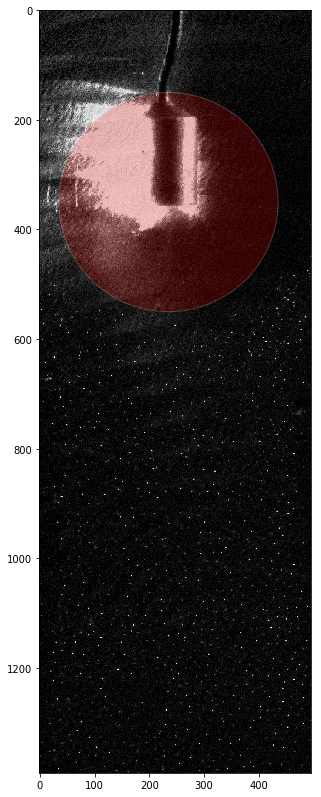

In [30]:
xc = 235
yc = 350
r_sample = 200
fig, ax = plt.subplots()
circle1 = plt.Circle((xc, yc), r_sample, color='r', alpha = 0.2, edgecolor = 'w')
circle1.set_edgecolor('w')
ax.add_patch(circle1)
ax = plt.imshow(frames[180])

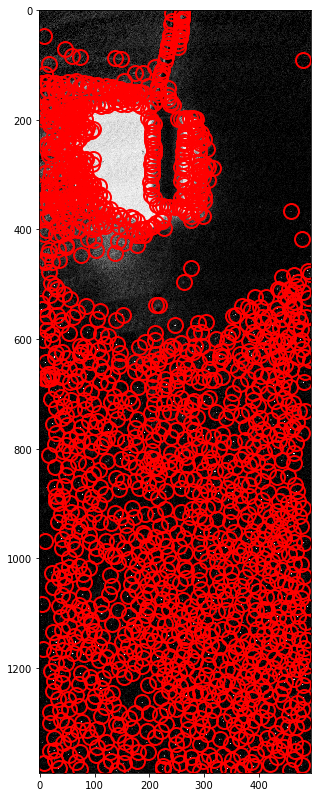

In [15]:
f = tp.locate(frames[180], 7, minmass = 120, separation = 2, threshold = 7)
tp.annotate(f, frames[180])

In [16]:
f_all = tp.batch(frames[:], 7, minmass = 120, separation = 2, threshold = 7)

Frame 299: 1941 features


In [17]:
f_all.tail()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
482453,1384.830013,405.375830,255.725794,1.202587,0.362681,47.205691,744.0,2.712675,299
482454,1384.961390,492.094595,175.917611,1.027611,0.288498,38.375850,542.0,-5.714609,299
482455,1387.902834,86.514170,167.766988,1.345257,0.453674,32.262882,672.0,5.718509,299
482456,1387.596774,111.163594,147.390431,1.195229,0.107500,27.508352,555.0,-7.142652,299
482457,1387.665779,124.374168,255.046575,1.236377,0.257322,46.526472,732.0,2.973138,299


In [18]:
# transform coordinates:
df_trans = f_all
df_trans['x'] = df_trans['x'] - float(xc)
df_trans['y'] = df_trans['y'] - float(yc)
df_trans.tail()


,y,x,mass,size,ecc,signal,raw_mass,ep,frame
482453,1094.830013,170.375830,255.725794,1.202587,0.362681,47.205691,744.0,2.712675,299
482454,1094.961390,257.094595,175.917611,1.027611,0.288498,38.375850,542.0,-5.714609,299
482455,1097.902834,-148.485830,167.766988,1.345257,0.453674,32.262882,672.0,5.718509,299
482456,1097.596774,-123.836406,147.390431,1.195229,0.107500,27.508352,555.0,-7.142652,299
482457,1097.665779,-110.625832,255.046575,1.236377,0.257322,46.526472,732.0,2.973138,299


In [19]:
def f_check_limited(x, y, frame, frame_begin, frame_end, left, right, maxY, minY):
    if (x <= right and x >= left and y <= maxY and y >= minY 
        and frame >= frame_begin and frame <= frame_end):
        return True
    else:
        return False
    

In [20]:
#vectorize the function f_check_limited, so can apply to arrays:
f_check_if_ROI = np.vectorize(f_check_limited)

In [21]:
ind = f_check_if_ROI(f_all['x'], f_all['y'], f_all['frame'], iBegin, iEnd, leftBorder, rightBorder, yMax, yMin)

In [22]:
f_test_roi = f_all[((f_all['x'] + f_all['y']) > 200)]

In [23]:
f_ROI = f_all[ind]

In [24]:
mpl.rcParams.update(default_rc)

C:\conda\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\conda\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


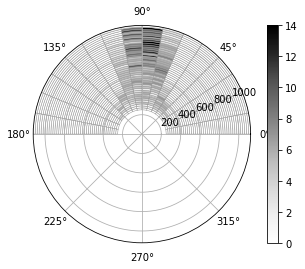

In [25]:
#mpl.rc('figure',  figsize=(6, 4))
#import matplotlib.pyplot as plt
#%matplotlib inline
indf = df_trans['frame'] == 180
df_trans_i = df_trans[indf]
hist = physt.polar(df_trans_i['x'], df_trans_i['y'], phi_range = (0, m.pi), radial_bins = nB, radial_range = (r_offset, yMax - yc))
#fig, ax = plt.subplots()
ax2 = hist.plot.polar_map()



In [26]:
radial = hist.projection("r")
rad_coord = (rad_bins[:,0] + rad_bins[:,1]) / 2.0
fig3, ax3 = plt.subplots()
ax3.scatter(rad_coord, radial.densities)
density_smoothed = savgol_filter(radial.densities, 5, 2)
ax3.plot(rad_coord, density_smoothed)
ax3.set_ylim(0, 0.001)

NameError: name 'rad_bins' is not defined

In [ ]:
os.chdir(r'../outputs')

In [ ]:
i = 15
m_str = f'{i:05d}'
print(m_str)

In [ ]:
for i in range(iBegin, iEnd, 10):
    print('frame ', i)
    #building histogram using cloud-in-cell (cic):
    indf = df_trans['frame'] == i
    df_trans_i = df_trans[indf]
    hist = physt.polar(df_trans_i['x'], df_trans_i['y'], phi_range = (0, m.pi), radial_bins = nB, radial_range = (r_offset, yMax - yc))
    radial = hist.projection("r")
    rad_coord = (rad_bins[:,0] + rad_bins[:,1]) / 2.0
    fig4, ax4 = plt.subplots()
    ax4.scatter(rad_coord, radial.densities)
    density_smoothed = savgol_filter(radial.densities, 5, 2)
    ax4.plot(rad_coord, density_smoothed)
    ax4.set_ylim(0, 0.0014)
    ax4.set_ylabel('density (a.u)')
    ax4.set_xlabel('coord. (px)')
    str_fig_fname = 'f_' + f'{i:05d}' + '.png'
    fig4.savefig(str_fig_fname)
    
    
    
    

In [ ]:
indf = f_ROI['frame'] == 233
f_ROI_i = f_ROI[indf]
counts, bins = np.histogram(f_ROI_i['y'], nB)
counts = np.array(counts, dtype = np.double)
YforHist = 0.5 * (bins[1:] + bins[:-1])
f1, ax1 = plt.subplots()
print(counts)
ax1.scatter(YforHist, counts)



In [ ]:
counts_smoothed = savgol_filter(counts, 5, 2)

In [ ]:
ax1.plot(YforHist, counts_smoothed)
f1

In [ ]:
x = np.array([2, 2, 5, 2, 1, 0, 1, 4, 9])

In [ ]:
savgol_filter(x, 5, 2)

In [ ]:
type(counts)

In [ ]:
type(x)

In [ ]:
counts

In [ ]:
x